In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Ruta de los archivos
hours_worked_data_path = '/content/drive/MyDrive/Libro DS AJT/Data/Salary Prediction/salary.csv'

salary_global_data_path = '/content/drive/MyDrive/Libro DS AJT/Data/Salary Prediction/salary_global_data.csv'

flags_data_path = '/content/drive/MyDrive/Libro DS AJT/Data/Salary Prediction/flags.csv'

# Leer el archivo CSV
df_hours = pd.read_csv(hours_worked_data_path)
print(df_hours.shape)

df_salary = pd.read_csv(salary_global_data_path)
print(df_salary.shape)

df_flags = pd.read_csv(flags_data_path,sep=';')
print(df_flags.shape)

(32561, 15)
(221, 7)
(193, 31)


In [4]:
df_hours.head() # https://www.kaggle.com/datasets/ayessa/salary-prediction-classification

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df_salary.head() # https://www.kaggle.com/datasets/zedataweaver/global-salary-data

,country_name,continent_name,wage_span,median_salary,average_salary,lowest_salary,highest_salary
0,Afghanistan,Asia,Monthly,853.74,1001.15,252.53,4460.97
1,Aland Islands,Europe,Monthly,3319.24,3858.35,972.52,17124.74
2,Albania,Europe,Monthly,832.84,956.92,241.22,4258.49
3,Algeria,Africa,Monthly,1148.84,1308.81,330.11,5824.18
4,American Samoa,Oceania,Monthly,1390.00,1570.00,400.00,6980.00


In [6]:
df_hours.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education-num,int64
marital-status,object
occupation,object
relationship,object
race,object
sex,object


In [7]:
df_hours["native-country"].replace(' United-States', 'United States', inplace=True)

In [8]:
df_hours["native-country"].replace(' Columbia', 'Colombia', inplace=True)

In [9]:
df_hours["native-country"].unique()

array(['United States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       'Colombia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [10]:
df_salary.dtypes

,0
country_name,object
continent_name,object
wage_span,object
median_salary,float64
average_salary,float64
lowest_salary,float64
highest_salary,float64


In [11]:
df_salary["country_name"].unique()

array(['Afghanistan', 'Aland Islands', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Indian Ocean Territory', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Congo Democratic Republic', 'Cook Islands', 'Costa Rica',
       'Cote Divoire', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic',
       'East Timor', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia',
       'Faroe Islands

Data de banderas


In [12]:
df_flags.dtypes

,0
name,object
image,object
landmass,int64
zone,int64
area,int64
population,int64
language,int64
religion,int64
bars,int64
stripes,int64


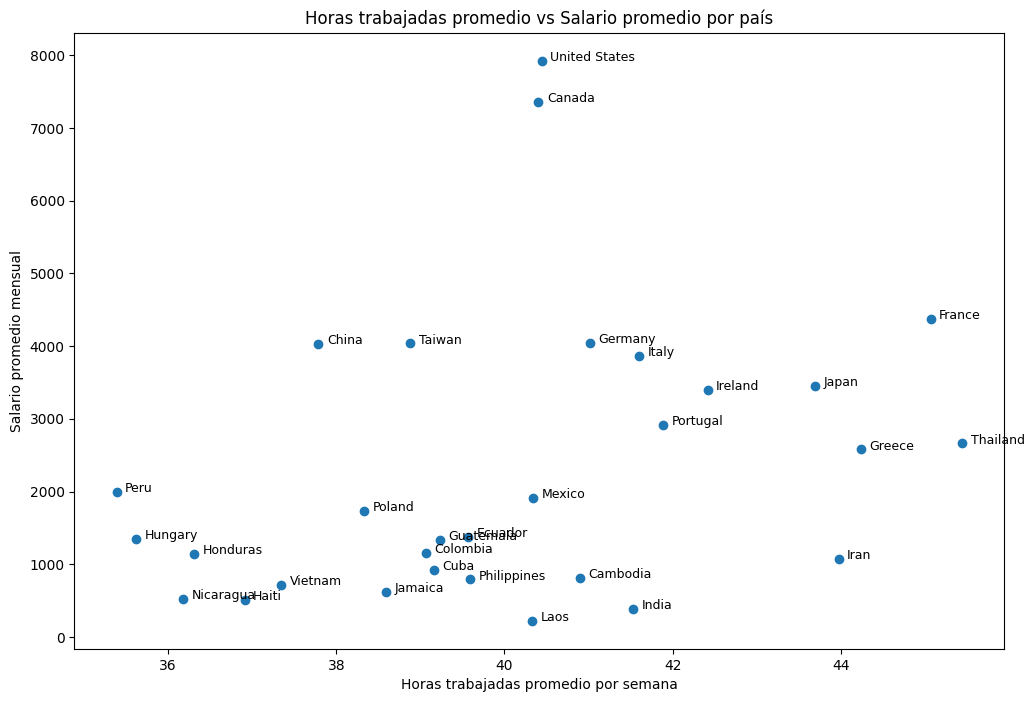

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Limpiar espacios en la columna 'native-country' en df_hours
df_hours['native-country'] = df_hours['native-country'].str.strip()

# Realizamos una fusión (join) entre df_hours y df_salary, basándonos en las columnas de país
merged_df = df_hours.groupby('native-country').agg({'hours-per-week': 'mean'}).reset_index()
merged_df = merged_df.merge(df_salary, left_on='native-country', right_on='country_name', how='inner')

# Crear gráfico de dispersión
plt.figure(figsize=(12, 8))
plt.scatter(merged_df['hours-per-week'], merged_df['average_salary'])

# Etiquetar los países en la gráfica
for i, row in merged_df.iterrows():
    plt.text(row['hours-per-week'] + 0.1, row['average_salary'], row['country_name'], fontsize=9)

# Agregar títulos y etiquetas
plt.title('Horas trabajadas promedio vs Salario promedio por país')
plt.xlabel('Horas trabajadas promedio por semana')
plt.ylabel('Salario promedio mensual')

# Mostrar el gráfico
plt.show()

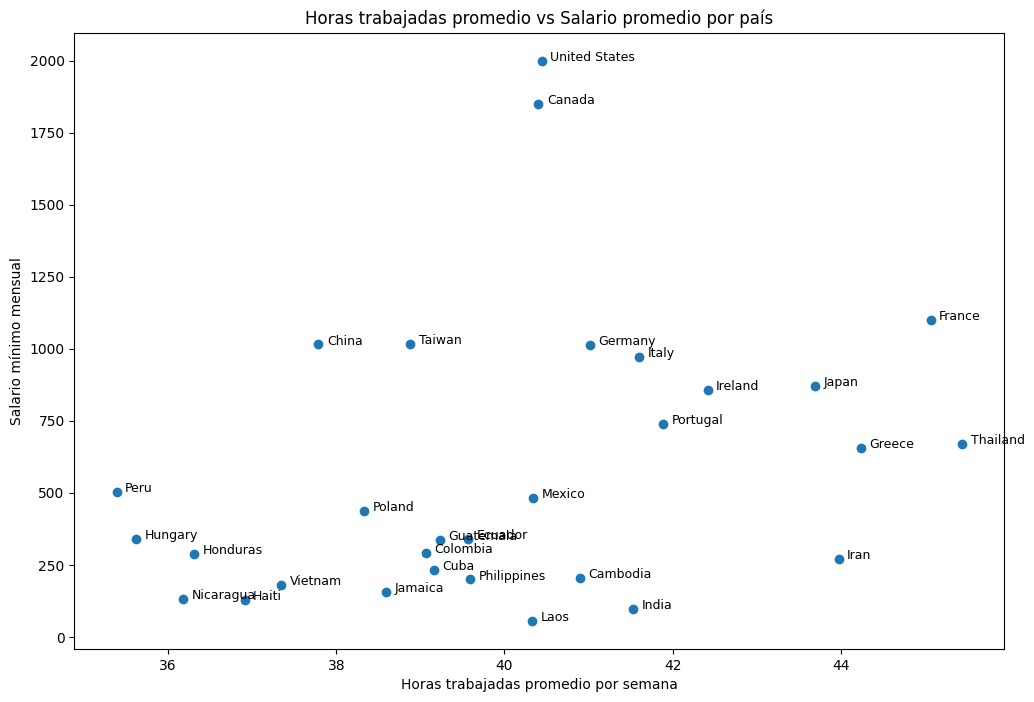

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Limpiar espacios en la columna 'native-country' en df_hours
df_hours['native-country'] = df_hours['native-country'].str.strip()

# Realizamos una fusión (join) entre df_hours y df_salary, basándonos en las columnas de país
merged_df = df_hours.groupby('native-country').agg({'hours-per-week': 'mean'}).reset_index()
merged_df = merged_df.merge(df_salary, left_on='native-country', right_on='country_name', how='inner')

# Crear gráfico de dispersión
plt.figure(figsize=(12, 8))
plt.scatter(merged_df['hours-per-week'], merged_df['lowest_salary'])

# Etiquetar los países en la gráfica
for i, row in merged_df.iterrows():
    plt.text(row['hours-per-week'] + 0.1, row['lowest_salary'], row['country_name'], fontsize=9)

# Agregar títulos y etiquetas
plt.title('Horas trabajadas promedio vs Salario promedio por país')
plt.xlabel('Horas trabajadas promedio por semana')
plt.ylabel('Salario mínimo mensual')

# Mostrar el gráfico
plt.show()

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os

# Limpiar espacios en la columna 'native-country' en df_hours
df_hours['native-country'] = df_hours['native-country'].str.strip()

# Realizamos una fusión (join) entre df_hours y df_salary, basándonos en las columnas de país
merged_df = df_hours.groupby('native-country').agg({'hours-per-week': 'mean'}).reset_index()
merged_df = merged_df.merge(df_salary, left_on='native-country', right_on='country_name', how='inner')

# Realizamos la fusión con df_flags para obtener las abreviaturas de los países
merged_df = merged_df.merge(df_flags, left_on='native-country', right_on='name', how='inner')

In [16]:
merged_df

,native-country,hours-per-week,country_name,continent_name,wage_span,median_salary,average_salary,lowest_salary,highest_salary,name,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Canada,40.404959,Canada,Northern America,Monthly,6311.03,7352.94,1850.00,32720.59,Canada,...,0,0,0,0,0,0,1,0,red,red
1,China,37.786667,China,Asia,Monthly,3684.93,4027.40,1015.07,17945.21,China,...,0,0,5,0,0,0,0,0,red,red
2,Colombia,39.067797,Colombia,South America,Monthly,995.60,1157.85,292.53,5137.79,Colombia,...,0,0,0,0,0,0,0,0,gold,red
3,Cuba,39.157895,Cuba,Caribbean,Monthly,783.33,916.67,231.25,4079.17,Cuba,...,0,0,1,0,1,0,0,0,blue,blue
4,Ecuador,39.571429,Ecuador,South America,Monthly,1260.00,1370.00,340.00,6080.00,Ecuador,...,0,0,0,0,0,0,0,0,gold,red
5,France,45.068966,France,Europe,Monthly,3769.56,4377.38,1100.42,19467.23,France,...,0,0,0,0,0,0,0,0,blue,red
6,Greece,44.241379,Greece,Europe,Monthly,2241.01,2579.28,655.39,11522.20,Greece,...,0,1,0,0,0,0,0,0,blue,blue
7,Guatemala,39.234375,Guatemala,Central America,Monthly,1222.65,1335.88,337.15,5954.20,Guatemala,...,0,0,0,0,0,0,0,0,blue,blue
8,Haiti,36.909091,Haiti,Caribbean,Monthly,444.95,506.20,127.66,2250.59,Haiti,...,0,0,0,0,0,0,0,0,black,red
9,Honduras,36.307692,Honduras,Central America,Monthly,1022.22,1139.39,287.27,5090.91,Honduras,...,0,0,5,0,0,0,0,0,blue,blue


In [17]:
merged_df.country_name.unique()

array(['Canada', 'China', 'Colombia', 'Cuba', 'Ecuador', 'France',
       'Greece', 'Guatemala', 'Haiti', 'Honduras', 'Hungary', 'India',
       'Iran', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Laos', 'Mexico',
       'Nicaragua', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Taiwan',
       'Thailand', 'Vietnam'], dtype=object)

In [18]:
len(merged_df.country_name.unique())

27

In [19]:
# Diccionario de mapeo de country_name a country_abbreviation
country_to_abbreviation = {
    'Canada': 'CA-flag',
    'China': 'CH-flag',
    'Cuba': 'CU-flag',
    'Colombia':'CO-flag',
    'Ecuador': 'EC-flag',
    'France': 'FR-flag',
    'Greece': 'GR-flag',
    'Guatemala': 'GT-flag',
    'Haiti': 'HA-flag',
    'Honduras': 'HO-flag',
    'Hungary': 'HU-flag',
    'India': 'IN-flag',
    'Iran': 'IR-flag',
    'Ireland': 'EI-flag',
    'Italy': 'IT-flag',
    'Jamaica': 'JM-flag',
    'Japan': 'JA-flag',
    'Laos': 'LA-flag',
    'Mexico': 'MX-flag',
    'Nicaragua': 'NU-flag',
    'Peru': 'PE-flag',
    'Philippines': 'PH-flag',
    'Poland': 'PL-flag',
    'Portugal': 'PO-flag',
    'Taiwan': 'TW-flag',
    'Thailand': 'TH-flag',
    'United States':'US-flag',
    'Vietnam': 'VM-flag'
}

# Crear la columna country_abbreviation
merged_df['country_abbreviation'] = merged_df['country_name'].map(country_to_abbreviation)

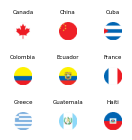

In [20]:
import os
from PIL import Image, ImageOps, ImageDraw
import matplotlib.pyplot as plt

# Ruta de la carpeta de banderas en tu Google Drive
flags_folder = '/content/drive/MyDrive/Libro DS AJT/Data/Flags Images'



# Función para recortar la imagen en forma de círculo pequeño
def circular_image(image_path, size=50):
    # Abre la imagen y la redimensiona a un cuadrado pequeño
    img = Image.open(image_path).convert("RGBA")
    img = ImageOps.fit(img, (size, size), centering=(0.5, 0.5))

    # Crear una máscara circular
    mask = Image.new("L", img.size, 0)
    draw = ImageDraw.Draw(mask)
    draw.ellipse((0, 0, img.size[0], img.size[1]), fill=255)

    # Aplica la máscara circular a la imagen
    img.putalpha(mask)

    return img

# Procesar y mostrar las imágenes
fig, axes = plt.subplots(3, 3, figsize=(1.5, 1.5))  # Ajusta el tamaño total de la figura
axes = axes.flatten()

for i, (country, abbr) in enumerate(country_to_abbreviation.items()):
    if i >= 9:  # Muestra solo las primeras 9 imágenes como ejemplo
        break

    file_path = os.path.join(flags_folder, f"{abbr}.gif")

    if os.path.exists(file_path):
        circular_flag = circular_image(file_path, size=50)  # Hacemos los círculos pequeños
        axes[i].imshow(circular_flag)
        axes[i].set_title(country, fontsize=4)
        axes[i].axis('off')  # Quitamos los ejes para que se vea más limpio
    else:
        print(f"Archivo no encontrado: {file_path}")

plt.tight_layout()
plt.show()


array(['Canada', 'China', 'Colombia', 'Cuba', 'Ecuador', 'France',
       'Greece', 'Guatemala', 'Haiti', 'Honduras', 'Hungary', 'India',
       'Iran', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Laos', 'Mexico',
       'Nicaragua', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Taiwan',
       'Thailand', 'Vietnam'], dtype=object)

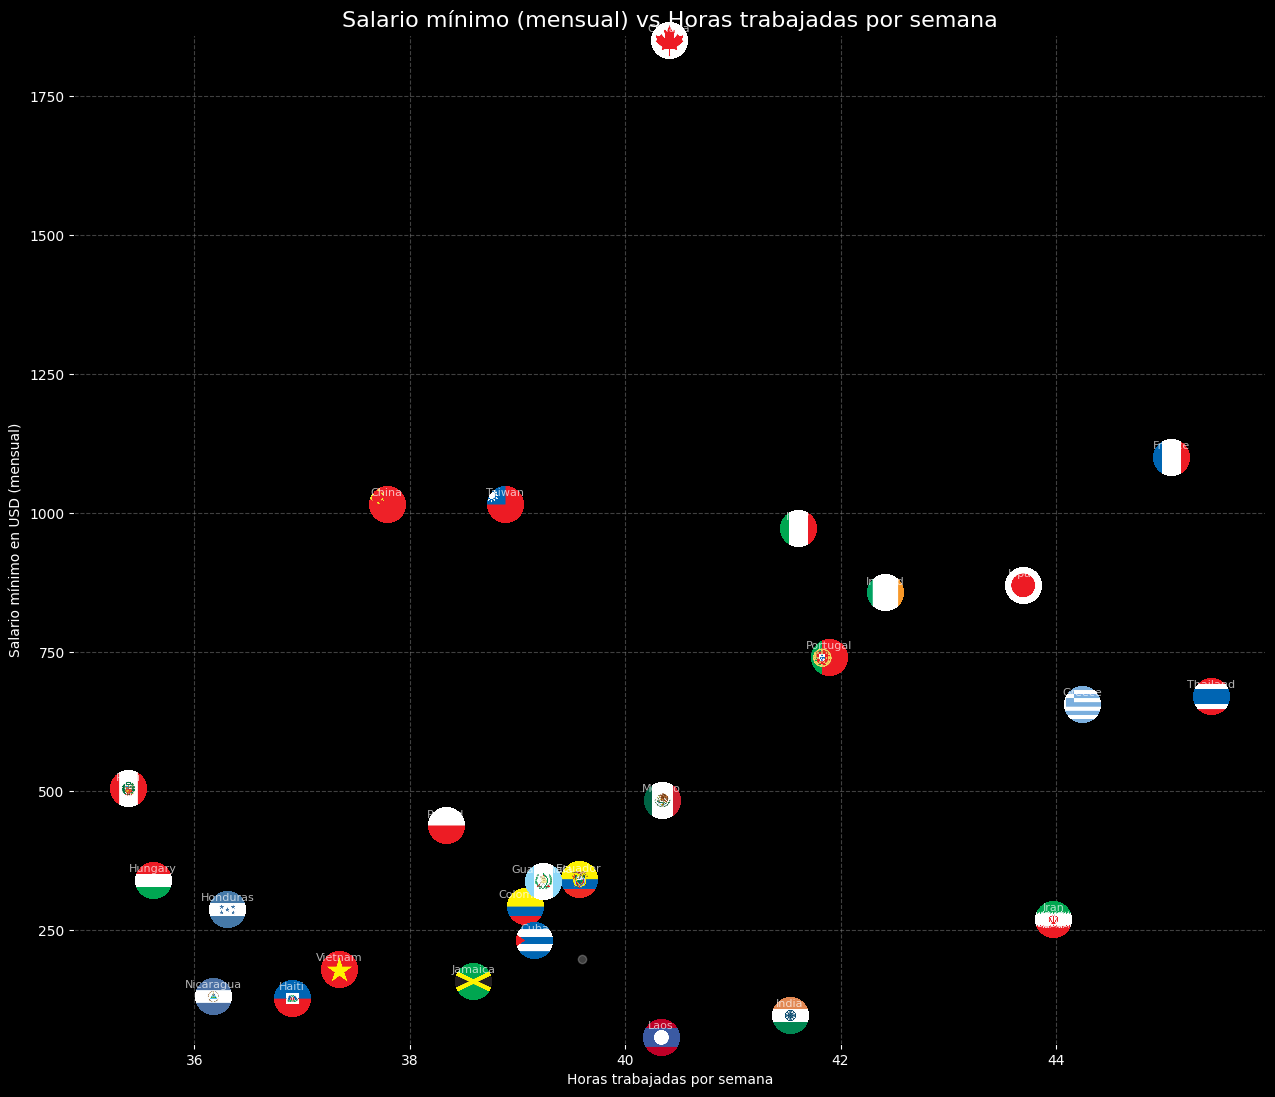

In [22]:
import os
import pandas as pd
import numpy as np
from PIL import Image, ImageOps, ImageDraw
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.patches import Circle

def circular_image(image_path, size=10):
    img = Image.open(image_path).convert("RGBA")
    img = ImageOps.fit(img, (size, size), centering=(0.5, 0.5))
    mask = Image.new("L", img.size, 0)
    draw = ImageDraw.Draw(mask)
    draw.ellipse((0, 0, img.size[0], img.size[1]), fill=255)
    img.putalpha(mask)
    return img

# Crear el gráfico de dispersión con fondo negro
fig, ax = plt.subplots(figsize=(14, 12), facecolor='black')
ax.set_facecolor('black')

# Agregar grid (líneas de escala)
ax.grid(True, color='gray', linestyle='--', alpha=0.5)

# Graficar todos los puntos como un scatter plot normal
ax.scatter(merged_df['hours-per-week'], merged_df['lowest_salary'], alpha=0.3, color='lightgray')

# Reemplazar los puntos con las imágenes de las banderas y agregar etiquetas
for idx, row in merged_df.iterrows():
    country = row['country_name']
    hours_per_week = row['hours-per-week']
    lowest_salary = row['lowest_salary']

    if country in country_to_abbreviation:
        flag_file = os.path.join(flags_folder, f"{country_to_abbreviation[country]}.gif")

        if os.path.exists(flag_file):
            img = circular_image(flag_file, size=260)
            imagebox = OffsetImage(img, zoom=0.1)
            ab = AnnotationBbox(imagebox, (hours_per_week, lowest_salary), frameon=False, bboxprops=dict(alpha=0.8))
            ax.add_artist(ab)

            # Agregar etiqueta con el nombre del país
            ax.annotate(country, (hours_per_week, lowest_salary), xytext=(0, 5),
                        textcoords='offset points', ha='center', va='bottom',
                        fontsize=8, alpha=0.7, color='white')

# Ajustar los límites del gráfico
ax.set_xlim(merged_df['hours-per-week'].min() - 0.5, merged_df['hours-per-week'].max() + 0.5)
ax.set_ylim(merged_df['lowest_salary'].min() - 10, merged_df['lowest_salary'].max() + 10)

# Etiquetas de los ejes
ax.set_xlabel('Horas trabajadas por semana', color='white')
ax.set_ylabel('Salario mínimo en USD (mensual)', color='white')

# Cambiar el color de los ticks y labels de los ejes
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')


# Agregar el título al gráfico
plt.title('Salario mínimo (mensual) vs Horas trabajadas por semana', color='white', fontsize=16)

plt.tight_layout()

plt.show()